In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

#import sklearn 

#from numpy import mean
#from numpy import std

#from sklearn.preprocessing import StandardScaler

#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


#from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
ordinal.head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [5]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [6]:
GB = GradientBoostingRegressor()

In [7]:

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25, random_state = 1)
    
GB.fit(X_train, Y_train)
y_pred = GB.predict(X_test)

GB_Score = r2_score(Y_test, y_pred)
GB_Score
    

0.9181575776177098

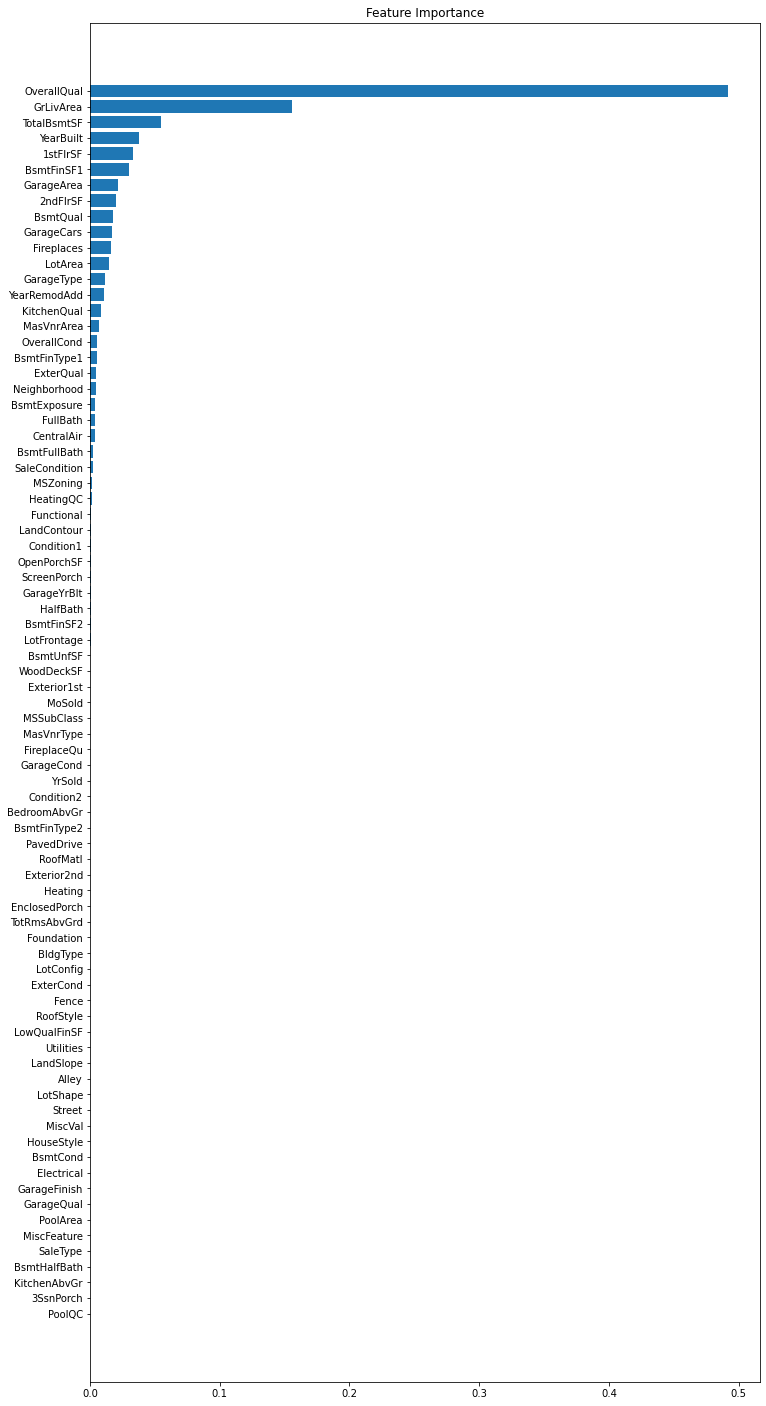

In [8]:
feature_importance = GB.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');


In [9]:
X_cols = ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, GB.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.49154026228776526),
 ('GrLivArea', 0.15610270879743673),
 ('TotalBsmtSF', 0.05481387660637798),
 ('YearBuilt', 0.03771209251661736),
 ('1stFlrSF', 0.03348720580990364),
 ('BsmtFinSF1', 0.029812317291613905),
 ('GarageArea', 0.02174836032921921),
 ('2ndFlrSF', 0.019981231661670776),
 ('BsmtQual', 0.01772054042197984),
 ('GarageCars', 0.016634390155551328),
 ('Fireplaces', 0.015992681570600145),
 ('LotArea', 0.014960877146098783),
 ('GarageType', 0.011974999847929883),
 ('YearRemodAdd', 0.010540857581223256),
 ('KitchenQual', 0.008876489995854636),
 ('MasVnrArea', 0.006802994436816388),
 ('OverallCond', 0.005631654047001441),
 ('BsmtFinType1', 0.005592786178841885),
 ('ExterQual', 0.004700047827116035),
 ('Neighborhood', 0.004647035271964827),
 ('BsmtExposure', 0.003885853462326237),
 ('FullBath', 0.003800563740022858),
 ('CentralAir', 0.0036326329664644634),
 ('BsmtFullBath', 0.0026304404440615414),
 ('SaleCondition', 0.00254277189653456),
 ('MSZoning', 0.001808655558